What is an API?

- **API** stands for **Application Programming Interface**, and essentially it is a way to share data with third party applications. If the website provides an API, use it to fetch the data. You can understand this as a middleman between a programmer and an application. This middleman accepts requests and, if that request is allowed, returns the data.

# Imports

In [362]:
import urllib
import json
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import urllib.request
import time
from hidden import meetup_api_key

Here’s a quick overview of these libraries:
- **urllib**: This module provides a high-level interface for fetching data from the World Wide Web.
- **json** (Java Script Object Notation): The json library can parse JSON from strings or files. The library parses JSON into a Python dictionary or list.
- **pandas**: It is used for structured data operations and manipulations. It is extensively used for data munging and preparation.
- **matplotlib**: It is used for plotting vast variety of graphs, starting from histograms to line plots to heat plots.
- **geocoders**: Simple and consistent geocoding library written in Python.

To access API based automated solution, we would require value for ```sig_id``` and ```sig``` (different for different users). Follow below steps to access these.

- Login on meetup.com. if you don’t have an account, then please signup
- To extract information about groups, go to API. 
- Here, you can provide your input keywords for city, country, state, topic and various other fields for extracting relevant information. Provide value for any of the field. Like for topics, I have given “Python” and click on ‘show response’. You will get a ```signed url```. It  displays value for ```sig_id``` and ```sig```, store these values.
    - https://secure.meetup.com/meetup_api/console/?path=/find/events

# Generate list of "signed urls" for all cities

In [49]:
cities = ['Palo-Alto', 'San-Jose', 'Portland', 'Austin', 'Denver', 'San-Diego', 'Washington', 'Boston', 
                 'San-Francisco', 'Seattle', 'Atlanta', 'Los-Angeles', 'Chicago', 'New-York', 'Mountain-View',
                 'Santa-Monica', 'Cambridge', 'Salt-Lake-City', 'Raleigh', 'Nashville', 'Sunnyvale', 'Boulder',
                 'Irvine', 'Philadelphia', 'Dallas', 'Bellevue', 
                 'Charlotte', 'Plano', 'Richmond']
urls = [] #url lists
radius = 8.0 #add the radius in miles
data_format = "json"
topic = "data-science" #add your choice of topic here

# Read data from URL and access relevant features in a DataFrame
Now, we have list of URLs for all cities. Next, we will use urllib library to read data into JSON format. Then, we’ll read the data to a list before converting it to a DataFrame.

In [171]:
def city_meetups(urls):
    for url in urls:
        response = urllib.request.urlopen(url)
        data = json.loads(response.read())
        data=data["results"] #accessed data of results key only

        for i in data :
            city = i['city']
            country = i['country']
            rating = i['rating']
            name = i['name']
            members = i['members']
            
            result = {
            'city' : city,
            'country' : country,
            'rating' : rating,
            'name' : name,
            'members' : members,
            }
            yield result

In [172]:
d = list(city_meetups(urls))
d = pd.DataFrame(d)

In [173]:
d.city.value_counts()

Mountain View     26
Seattle           26
Boston            21
Austin            20
Washington        20
Portland          20
San Francisco     20
New York          20
Chicago           20
Dallas            20
Cambridge         18
Santa Clara       17
Salt Lake City    17
Palo Alto         16
Charlotte         16
Los Angeles       15
Santa Monica      13
Philadelphia      12
Raleigh           11
Atlanta           11
Irvine             9
San Jose           8
Redmond            7
Bellevue           7
Nashville          7
Plano              6
Sunnyvale          5
Richmond           5
Boulder            4
Stanford           4
Costa Mesa         2
Los Altos          2
Venice             1
Menlo Park         1
Del Mar            1
San Diego          1
Arlington          1
Denver             1
Redwood City       1
Richardson         1
Name: city, dtype: int64

In [161]:
cities_dct = {
    'palo-alto' : ['CA', '94301'],
    'san-jose' : ['CA', '95113'],
    'portland' : ['OR', '97205'],
    'austin' : ['TX', '78701'],
    'denver' : ['CO', '80218'],
    'san-diego' : ['GA', '92007'],
    'washington' : ['DC', '20004'],
    'boston' : ['MA', '02201'],
    'san-francisco' : ['CA', '94102'],
    'seattle' : ['WA', '98121'],
    'atlanta' : ['WA', '30303'],
    'los-angeles' : ['CA', '90013'],
    'chicago' : ['IL', '60604'],
    'new-york' : ['NY', '10013'],
    'mountain-view' : ['CA', '94041'],
    'santa-monica' : ['GA', '90401'],
    'cambridge' : ['MA', '02138'],
    'salt-lake-city' : ['UT', '84111'],
    'raleigh' : ['NC', '27601'],
    'nashville' : ['TN', '37243'],
    'sunnyvale' : ['CA', '94086'],
    'boulder' : ['CO', '80302'],
    'irvine' : ['CA', '92614'],
    'philadelphia' : ['PA', '19107'],
    'dallas' : ['TX', '75201'],
    'bellevue' : ['WA', '98004'],
    'charlotte' : ['NC', '28202'],
    'Plano' : ['TX', '75074'],
    'Richmond' : ['VA', '23219'],    
}


In [356]:
def make_meetup_urls_10(topic, meetup_api_key):
    urls = []
    for city, info in zip(cities_dct.keys(), cities_dct.values()):
        state = info[0]
        zip_code = info[1]
        urls.append('https://api.meetup.com/2/groups?key=' + meetup_api_key + '&sign=true&photo-host=public&topic=' + topic + '&zip=' + zip_code + '&radius=5.0&city=' + city + '&state=' + state +'&page=10')
    return urls

## Bar chart for number of Data Science per city

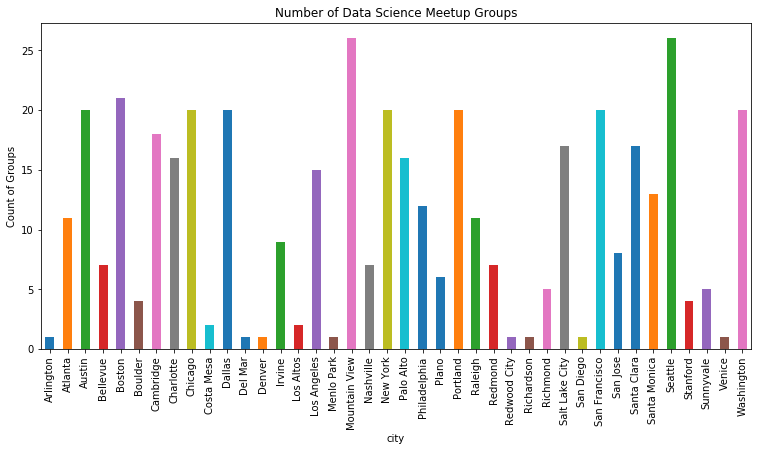

In [182]:
freq = d.groupby('city').city.count() 
fig = plt.figure(figsize=(28,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('City')
ax1.set_ylabel('Count of Groups')
ax1.set_title("Number of Data Science Meetup Groups")
freq.plot(kind='bar') 

## Bar chart for average number of members per group in each city

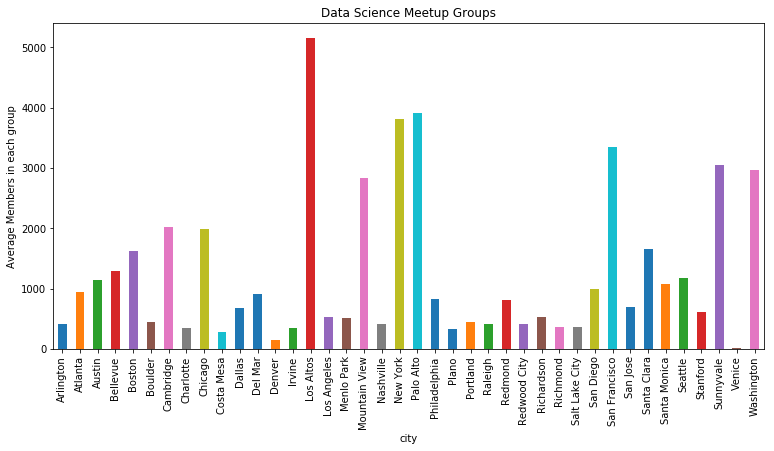

In [183]:
freq = d.groupby('city').members.sum()/d.groupby('city').members.count()
fig = plt.figure(figsize=(28,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('City')
ax1.set_ylabel('Average Members in each group')
ax1.set_title("Data Science Meetup Groups")
freq.plot(kind='bar')

## Bar chart for average rating of groups in each city

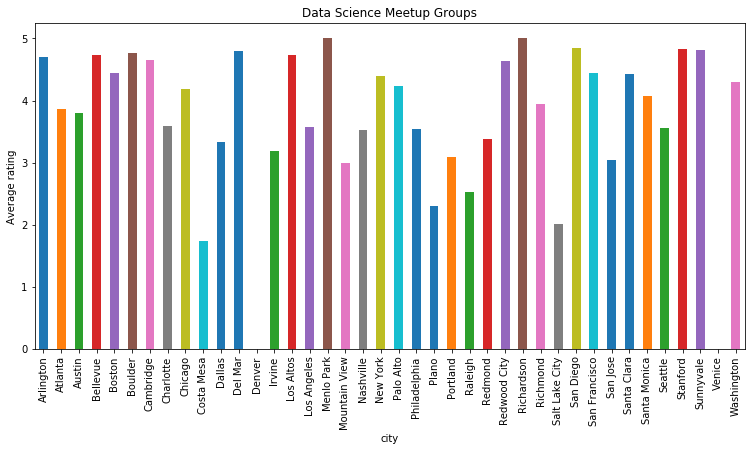

In [184]:
freq = d.groupby('city').rating.sum()/d.groupby('city').rating.count()
fig = plt.figure(figsize=(28,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('City')
ax1.set_ylabel('Average rating')
ax1.set_title("Data Science Meetup Groups")
freq.plot(kind='bar')

# Data Science

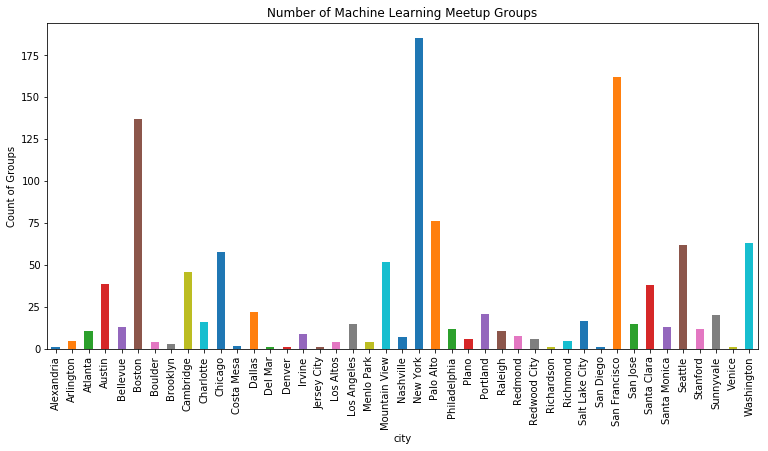

In [318]:
ds_urls = make_meetup_urls2('data-science')

ds_cities = list(city_meetups(ds_urls))
ds_cities = pd.DataFrame(ds_cities)

ds_freq = ds_cities.groupby('city').city.count() 
fig = plt.figure(figsize=(28,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('City')
ax1.set_ylabel('Count of Groups')
ax1.set_title("Number of Machine Learning Meetup Groups")
ds_freq.plot(kind='bar') 

# Machine Learning

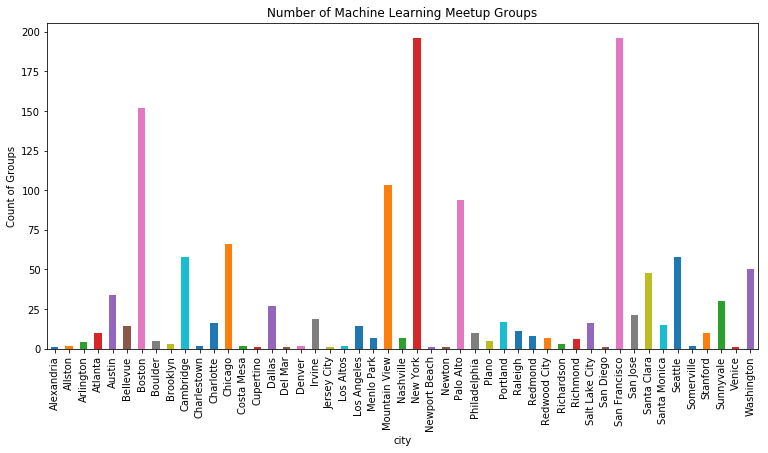

In [357]:
ml_urls = make_meetup_urls2('machine-learning')

ml_cities = list(city_meetups(ml_urls))
ml_cities = pd.DataFrame(ml_cities)

ml_freq = ml_cities.groupby('city').city.count() 
fig = plt.figure(figsize=(28,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('City')
ax1.set_ylabel('Count of Groups')
ax1.set_title("Number of Machine Learning Meetup Groups")
ml_freq.plot(kind='bar') 

# Philosophy

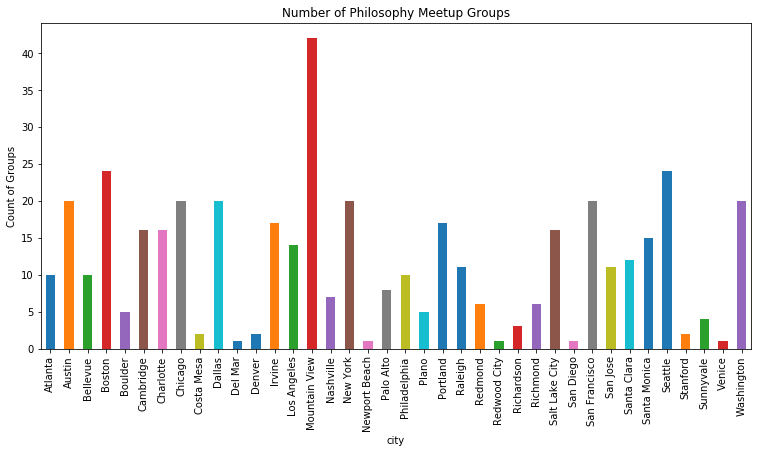

In [316]:
phil_url = make_meetup_urls2('philosophy')

phil_cities = list(city_meetups(url2))
phil_cities = pd.DataFrame(phil_cities)

phil_freq = phil_cities.groupby('city').city.count() 
fig = plt.figure(figsize=(28,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('City')
ax1.set_ylabel('Count of Groups')
ax1.set_title("Number of Philosophy Meetup Groups")
phil_freq.plot(kind='bar')

# Hiking

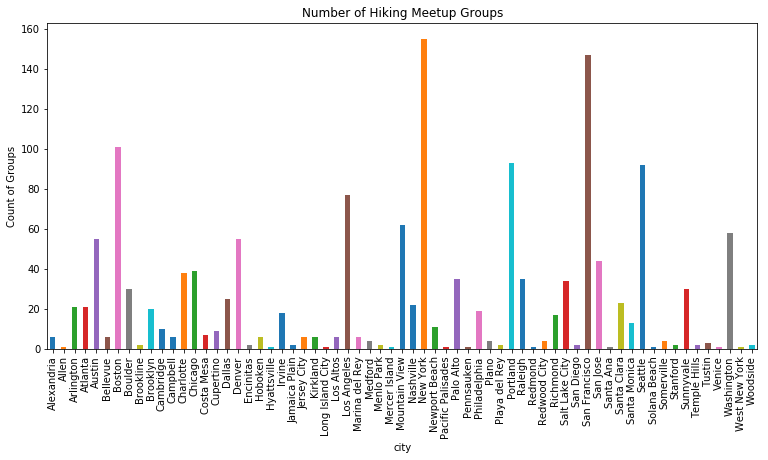

In [317]:
hiking_url = make_meetup_urls2('hiking')

hiking_cities = list(city_meetups(hiking_url))
hiking_cities = pd.DataFrame(hiking_cities)

hiking_freq = hiking_cities.groupby('city').city.count() 
fig = plt.figure(figsize=(28,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('City')
ax1.set_ylabel('Count of Groups')
ax1.set_title("Number of Hiking Meetup Groups")
hiking_freq.plot(kind='bar')

# Yoga

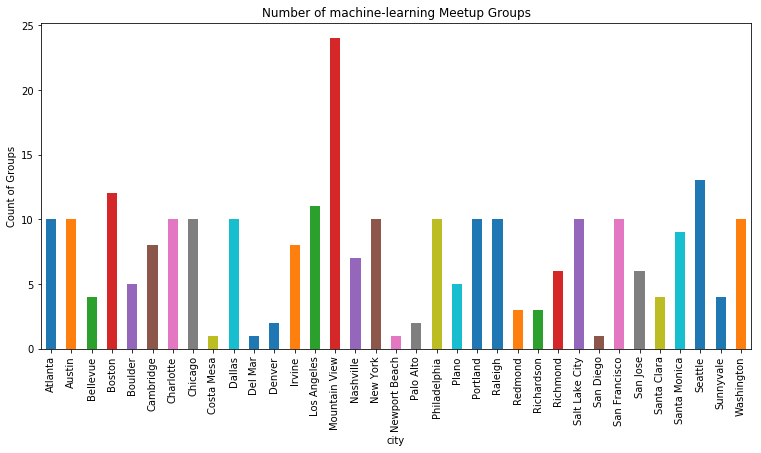

In [360]:
url = make_meetup_urls_10('machine-learning')

cities = list(city_meetups(url))
cities = pd.DataFrame(cities)

freq = cities.groupby('city').city.count() 
fig = plt.figure(figsize=(28,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('City')
ax1.set_ylabel('Count of Groups')
ax1.set_title("Number of machine-learning Meetup Groups")
freq.plot(kind='bar')

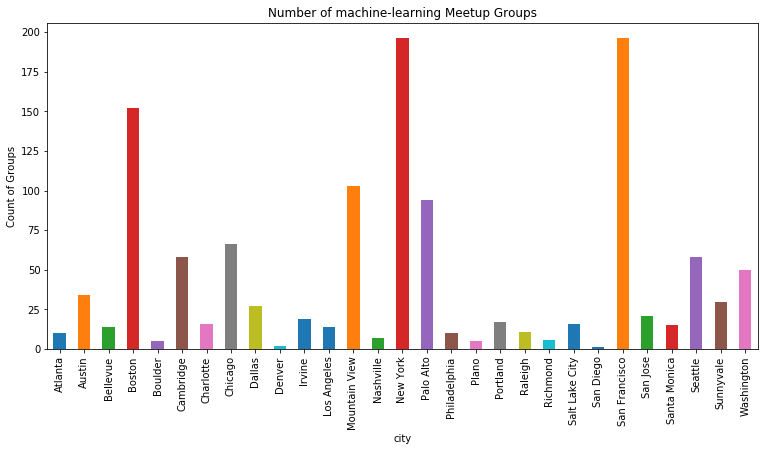

In [361]:
plot_meetups_by_city('machine-learning')

# Neuroscience

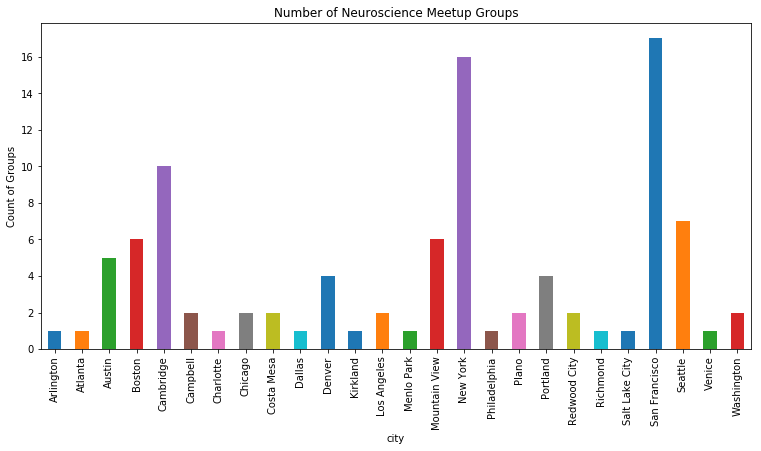

In [320]:
neuro_url = make_meetup_urls2('neuroscience')

neuro_cities = list(city_meetups(neuro_url))
neuro_cities = pd.DataFrame(neuro_cities)

neuro_freq = neuro_cities.groupby('city').city.count() 
fig = plt.figure(figsize=(28,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('City')
ax1.set_ylabel('Count of Groups')
ax1.set_title("Number of Neuroscience Meetup Groups")
neuro_freq.plot(kind='bar')

# Reading

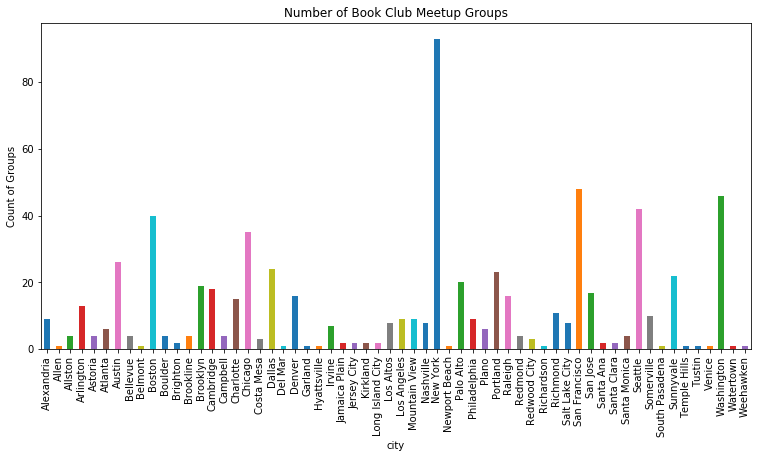

In [321]:
book_url = make_meetup_urls2('reading')

book_cities = list(city_meetups(book_url))
book_cities = pd.DataFrame(book_cities)

book_freq = book_cities.groupby('city').city.count() 
fig = plt.figure(figsize=(28,6))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('City')
ax1.set_ylabel('Count of Groups')
ax1.set_title("Number of Book Club Meetup Groups")
book_freq.plot(kind='bar')

In [365]:
def make_meetup_urls2(topic, meetup_api_key):
    urls = []
    for city, info in zip(cities_dct.keys(), cities_dct.values()):
        state = info[0]
        zip_code = info[1]
        urls.append('https://api.meetup.com/2/groups?key=' + meetup_api_key + '&sign=true&photo-host=public&topic=' + topic + '&zip=' + zip_code + '&radius=5.0&city=' + city + '&state=' + state +'&page=200')
    return urls

def plot_meetups_by_city(topic):
    urls = make_meetup_urls2(topic, meetup_api_key)
    cities = list(city_meetups(urls))
    cities = pd.DataFrame(cities)
    cities = cities.loc[cities['city'].isin(['Palo Alto', 'San Jose', 'Portland', 'Austin', 'Denver', 'San Diego', 'Washington', 'Boston', 
                     'San Francisco', 'Seattle', 'Atlanta', 'Los Angeles', 'Chicago', 'New York', 'Mountain View',
                     'Santa Monica', 'Cambridge', 'Salt Lake City', 'Raleigh', 'Nashville', 'Sunnyvale', 'Boulder',
                     'Irvine', 'Philadelphia', 'Dallas', 'Bellevue', 
                     'Charlotte', 'Plano', 'Richmond'])]
    freq = cities.groupby('city').city.count() 
    fig = plt.figure(figsize=(28,6))
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('City')
    ax1.set_ylabel('Count of Groups')
    ax1.set_title(f"Number of {topic} Meetup Groups")
    freq.plot(kind='bar') 

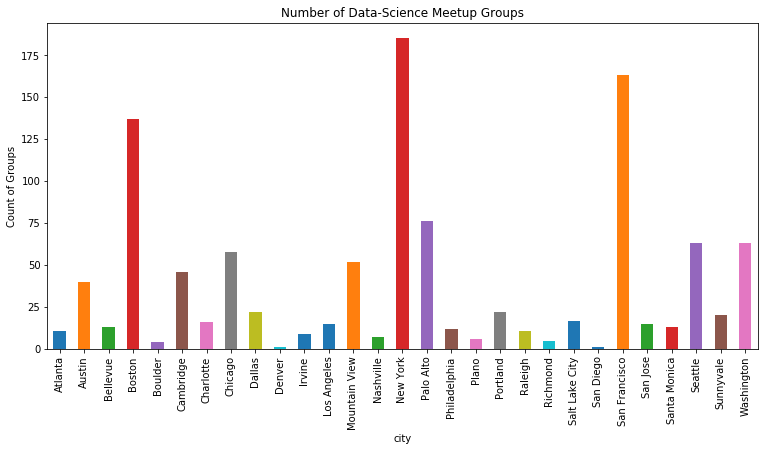

In [366]:
plot_meetups_by_city('Data-Science')

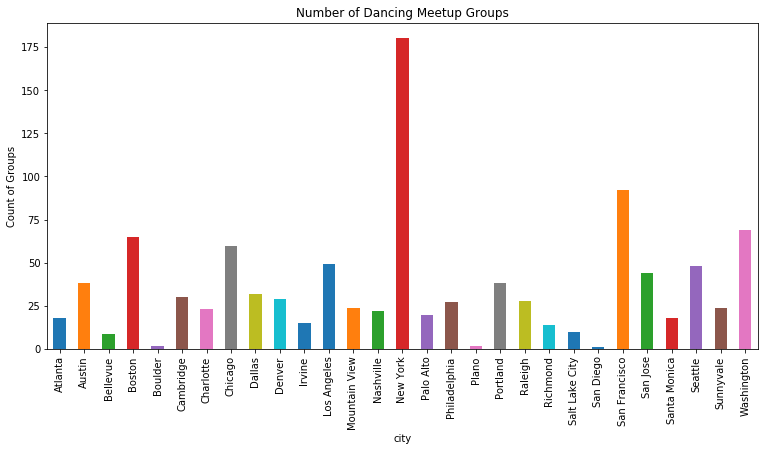

In [352]:
plot_meetups_by_city('Dancing')

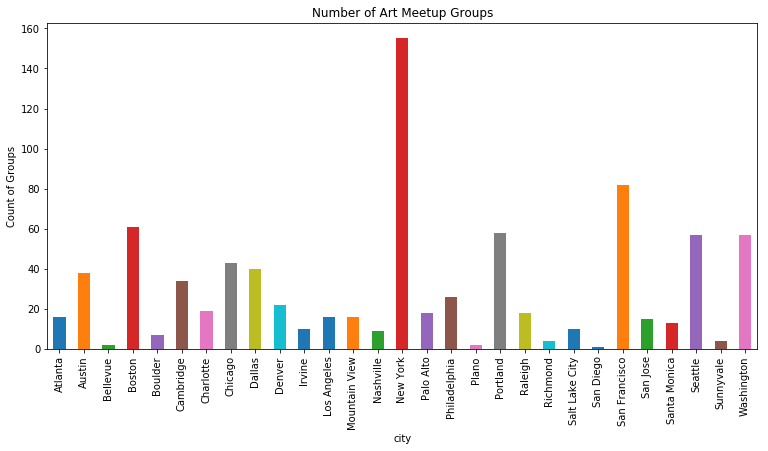

In [350]:
plot_meetups_by_city('Art')

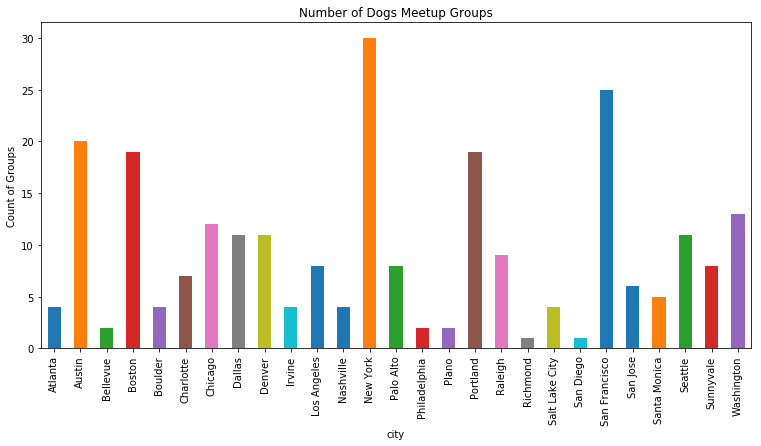

In [355]:
plot_meetups_by_city('Dogs')